<a href="https://colab.research.google.com/github/metahwi/MachineLearning/blob/main/Tensor_Calculus_and_Statistical_Applications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensor Calculus and Statistical Applications


This notebook aims to refine the fundamentals of programming tensor operations with PyTorch with an extension to include the implementation of advanced tensor calculus and probabilistic functions.

## Tensor Calculus
PyTorch logic is sequential in the sense that multiple functional relationships can be defined sequentially to implement a computational graph, representing a set of equations a machine learning model might encapsulate. This encapsulation property is useful when designing machine learning models in terms of high-level building blocks representing functions of different nature and purposes.

Let's start by implementing the differentiation of: **the sine function**:

$$
f(x) = \sin(x)
$$

The derivative is given by

$$
f'(x) = \cos(x)
$$

If we wanted to make this function and its derivative available to use in our machine learning model we could implement it using PyTorch in the following way:

In [ ]:
# Define the sigmoid function.
def f(x):
    return torch.sin(x)

# Hard code the gradient of the sigmoid function.
def df(x):
    return torch.cos(x)

This notation allows the function and its derivate to be available at all times during the computation of the model. In practice, computing derivatives by hand and implementing them in our program may be difficult and inefficient for a lot of functions. In such cases, we could opt to use the PyTorch automatic differentiation function autograd:

In [ ]:
import torch
from torch.autograd import grad

# Evaluate the gradient using autograd.
x = torch.tensor([0], dtype=torch.float32, requires_grad=True)
y = torch.sin(x)

grad(outputs=y, inputs=x)

(tensor([1.]),)

Let's look at the function and its derivative computed by auto-grad.

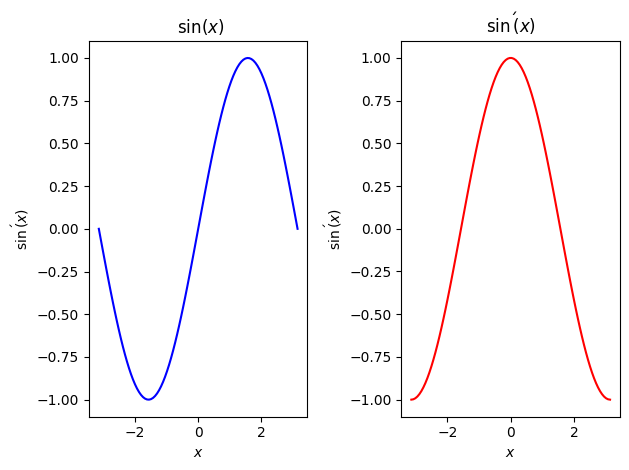

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

x = torch.linspace(-torch.pi, torch.pi, 100, requires_grad = True)

# First plot the autograd derivative.
ax1 = plt.subplot(121) # create a figure with 1 row and 2 columns and get the axis
y = torch.tensor([torch.sin(x[i]) for i in range(len(x))])
ax1.plot(x.clone().detach(), y.clone().detach(), 'b')
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$\sin\'(x)$')
ax1.set_title(r' $\sin(x)$')

# Second plot the hard-coded derivative.
ax2 = plt.subplot(122)

autog = []
for i in range(len(x)):
    x2 = x[i]
    y2 = torch.sin(x2)
    grd = grad(outputs=y2, inputs=x2)
    autog.append(grd)

autog = torch.tensor(autog)
ax2.plot(x.clone().detach(), autog.clone().detach(), 'r')
ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r'$\sin\'(x)$')
ax2.set_title(r'$\sin\'(x)$')

plt.tight_layout();

We can make use of the same principle to implement functions that express more complicated computations.

Let's extend our computational graph to include more operations.

$$
f(x) = 2 * \sin(x) + 0.5
$$

Since this function is a composition of multiple functions, we derive the derivative using the chain rule of differentiation.

$$
f'(x) = \frac{\partial(2)}{\partial x}*x + 2*\frac{\partial(\sin(x))}{\partial x} \\
+ \frac{\partial(0.5)}{\partial x}
$$


In any such case, PyTorch autograd would automatically derive the differentiation between the input and the function defined as the overall computational graph over the input (x).

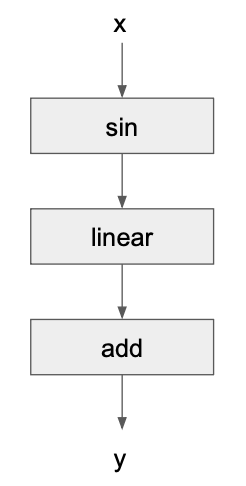

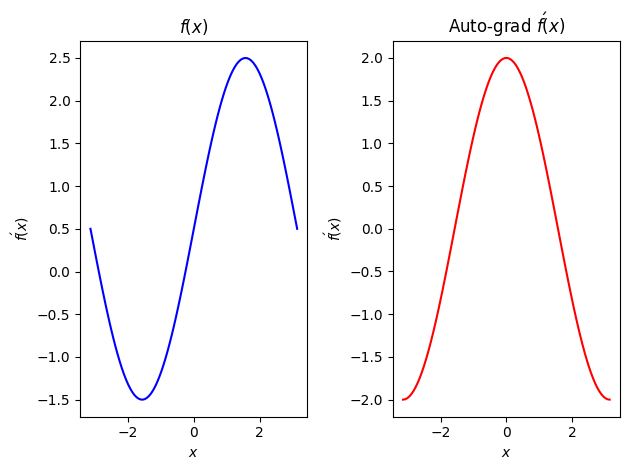

In [ ]:
import torch
from torch.autograd import grad
import matplotlib
import matplotlib.pyplot as plt

x = torch.linspace(-torch.pi, torch.pi, 100, requires_grad = True)
y = 2*torch.sin(x) + 0.5

# First plot the function.
ax1 = plt.subplot(121) # create a figure with 1 row and 2 columns and get the axis
ax1.plot(x.clone().detach(), y.clone().detach(), 'b')
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$f\'(x)$')
ax1.set_title(r'$f(x)$')

# Second plot the gradient.
ax2 = plt.subplot(122)

autog = []
for i in range(len(x)):
    x2 = x[i]
    y2 = 2*torch.sin(x2) + 0.5
    grd = grad(outputs=y2, inputs=x2)
    autog.append(grd)

autog = torch.tensor(autog)
ax2.plot(x.clone().detach(), autog.clone().detach(), 'r')
ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r'$f\'(x)$')
ax2.set_title(r'Auto-grad $f\'(x)$')

plt.tight_layout();

## Probability and Statistics in PyTorch

In the second part of the recitation we will revisit some of the fundamental concepts in probability theory and study how we can implement statistical applications using the functionalities provided in PyTorch.

## Discrete random variables

We will start by looking at a simple example of drawing a ball from a bag full of balls with different colors. Imagine that the bag contains a fixed number of 11 balls, where 5 of them are red, 2 are blue and 4 are green.

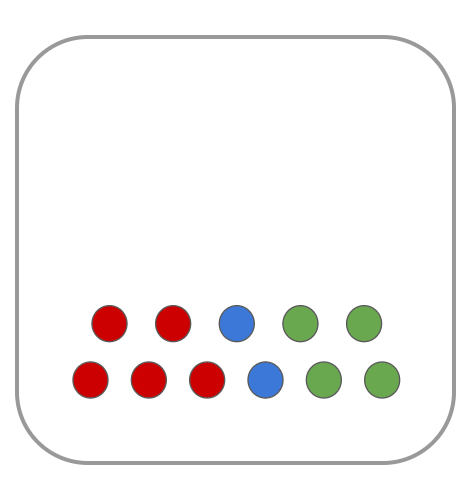

Let's initialize a Python program to represent the bag of balls. We can start by representing each ball type numerically, where red can be 1, blue can be 2, and green can be 3, inside a PyTorch tensor storing all of their values.

In [ ]:
import torch

bag = torch.tensor([1, 1, 2, 3, 3, 1, 1, 1, 2, 3, 3])
print(bag)

tensor([1, 1, 2, 3, 3, 1, 1, 1, 2, 3, 3])


Assume we are drawing from the bag each time with replacement (we put back the ball we picked into the bag). The first time the probability of drawing a blue ball is:

$$
  p(blue) = \frac{\#(blue)}{\#(total)} = \frac{2}{11} = 0.1818
$$

Let's now use our PyTorch program to compute the probabilities of drawing a ball from each color:

In [ ]:
p_blue = (bag == 2).sum() / bag.shape[0]
p_red = (bag == 1).sum() / bag.shape[0]
p_green = (bag == 3).sum() / bag.shape[0]

print("The probability of drawing a blue ball is: ", p_blue)
print("The probability of drawing a red ball is: ", p_red)
print("The probability of drawing a green ball is: ", p_green)

The probability of drawing a blue ball is:  tensor(0.1818)
The probability of drawing a red ball is:  tensor(0.4545)
The probability of drawing a green ball is:  tensor(0.3636)


We can use the probability values to plot the probability mass function as follows.

Text(0.5, 1.0, 'pmf of the categorical distribution (1: red, 2: blue, 3:green)')

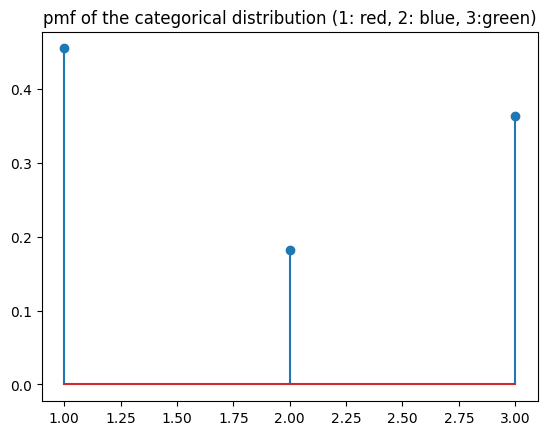

In [ ]:
import matplotlib.pyplot as plt

probs = torch.tensor([0.4545, 0.1818, 0.3636])

plt.figure()
plt.stem([1, 2, 3], probs)
plt.title('pmf of the categorical distribution (1: red, 2: blue, 3:green)')

Using the probabilities, we can compute the expected value of the random variable representing the experiment result.

Remark: the expected value $\mu$ (or the first moment) of a discrete random variable is defined as:

$$
  E\{x\} = \sum_{i=1}^{n} x*p(x)
$$

where $n$ should indicate the number of possible values.

In [ ]:
ids = torch.tensor([1, 2, 3])
probs = torch.tensor([0.4545, 0.1818, 0.3636])

Ex = 0
for i in range(3):
    Ex = Ex + ids[i]*probs[i]
Ex = Ex
print("Expected value is: ", Ex)

Expected value is:  tensor(1.9089)


We can also calculate the variance (or second moment) of the random variable, modeled as the outcome of the sampling experiment.

The variance is defined as

$$
  \sigma^2 = E \{ (x - \mu)^2 \}
$$


In [ ]:
var = 0
for i in range(3):
    var = var + (((ids[i] - Ex)**2) * probs[i])
var = var
print("Variance of x is: ", var)

Variance of x is:  tensor(0.8098)


Using the unique ball ID's and their probabilities, we can model sampling from the bag as a statistical process to perform further computations.

In PyTorch, one can define different functions representing probability distributions. In our example, we have a random experiment with a discrete random variable with a sample space of size 3 (*i.e.* could have a value out of three possible outcomes), so the experiment of sampling from the bag can be modeled with a **categorical distribution**. Note that if we independently sample a random variable from a categorical distribution $n$ times, this random process is also referred as a **multinomial process**.

In [ ]:
sampler = torch.multinomial(probs, num_samples=100, replacement=True)
# Note that sampler returns the indexes to the ids
samples = []
for idx in sampler:
    samples.append(ids[idx])
print(samples)

[tensor(2), tensor(2), tensor(3), tensor(3), tensor(1), tensor(1), tensor(2), tensor(3), tensor(2), tensor(3), tensor(2), tensor(3), tensor(1), tensor(1), tensor(2), tensor(1), tensor(1), tensor(3), tensor(3), tensor(3), tensor(1), tensor(1), tensor(3), tensor(1), tensor(1), tensor(1), tensor(1), tensor(3), tensor(1), tensor(1), tensor(3), tensor(2), tensor(2), tensor(1), tensor(1), tensor(1), tensor(1), tensor(1), tensor(2), tensor(3), tensor(1), tensor(1), tensor(3), tensor(3), tensor(3), tensor(1), tensor(3), tensor(2), tensor(3), tensor(1), tensor(1), tensor(1), tensor(1), tensor(3), tensor(3), tensor(1), tensor(3), tensor(2), tensor(1), tensor(1), tensor(1), tensor(2), tensor(1), tensor(3), tensor(1), tensor(1), tensor(3), tensor(3), tensor(3), tensor(1), tensor(3), tensor(3), tensor(3), tensor(2), tensor(1), tensor(3), tensor(1), tensor(2), tensor(2), tensor(2), tensor(1), tensor(3), tensor(3), tensor(1), tensor(1), tensor(1), tensor(2), tensor(2), tensor(1), tensor(2), tensor(3)

Now, we can see how random variables can be created and used in our PyTorch programs. Using the samples we have drawn from the bag, let's plot the sample values and see how the distribution of the samples representing the outcome of 1000 drawing experiments looks like.

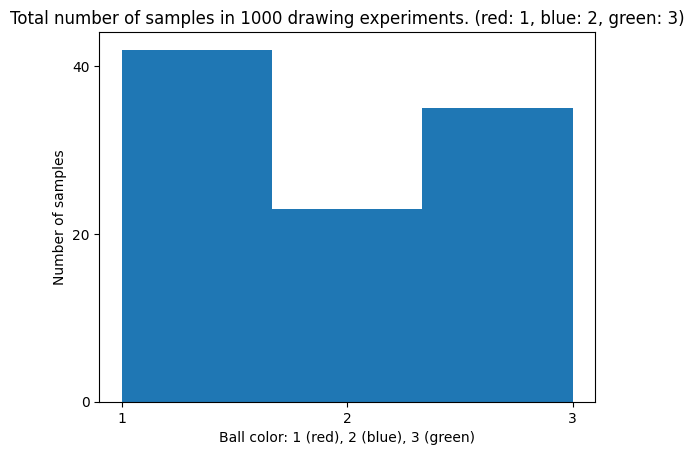

In [ ]:
import matplotlib.pyplot as plt

ax = plt.subplot(111)

samples = torch.tensor(samples)

ax.hist(samples, bins=3)
ax.locator_params(axis='both', nbins=4)

ax.set_xlabel(r'Ball color: 1 (red), 2 (blue), 3 (green)')
ax.set_ylabel(r'Number of samples')
ax.set_title(r'Total number of samples in 1000 drawing experiments. (red: 1, blue: 2, green: 3)')

plt.show()

## Random Ball Exercise

Write a Python function which each time it is called, samples a random ball from a bag with five different colors: white, black, red, blue and green, with uniform probabilities. Each time the function is called, display the ball color on the terminal. Assume the balls are drawn **without replacement**. Plot the sampled outcomes and discuss the experiment distribution.

*We can define a Multinomial distribution object (from torch.distributions) and use its method sample().

green
blue
red
black
white


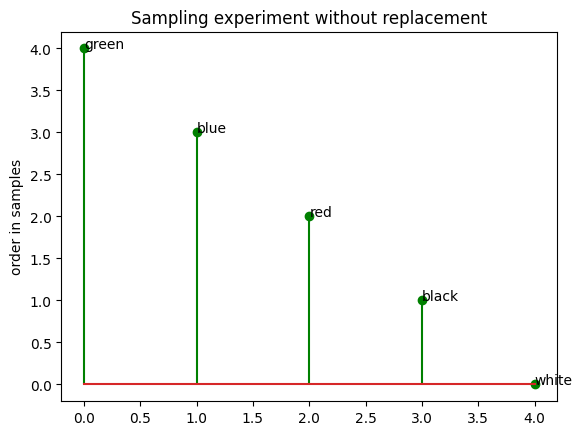

In [ ]:
## Your answer ##
import torch
import matplotlib.pyplot as plt

ids = ['white', 'black', 'red', 'blue', 'green']

# TO-DO: Define theoretical probabilities (given) and store in x
x = torch.tensor([0.2]*5)

# TO-DO: Define a multinomial distribution with parameters: num_samples and input (x)
samples = torch.multinomial(input=x, num_samples=5, replacement=False)

# Plot the samples pdf.
plt.figure()
plt.stem(samples.detach(), 'g')

for i, s in enumerate(samples):
  print(ids[s])
  plt.text(i,s, ids[s])

plt.ylabel('order in samples')
plt.title('Sampling experiment without replacement')

plt.show()

We can revisit discrete random processes and this time look at another example of tossing coins. Assume we are implementing a Python program which implements the experiment of tossing a coin n times and measuring the outcome as a random sequence.

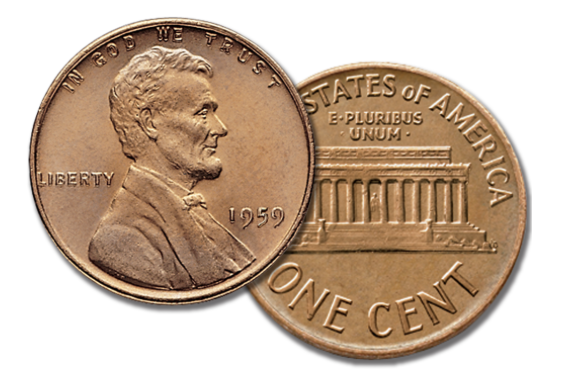

The process of drawing a sample from a binary a distribution is also called as the **Bernoulli trials**. Let's assume the event of observing a head (or a sequence of heads) as success (or the outcome of 1) and the tail as failure (or the outcome of 0).

We can define the probability of observing $k$ successes in a total of $n$ trials as:

$$
  P( [ X=k ]) = \binom{n}{k} p^k (1-p)^{n-k}
$$

where $p$ is the probability of *success* in a single trial, and $(1-p)$ represents the probability of failure, the only alternative event that will occur in case a head is not drawn.

**Note**: In our experiment, we do not require the successes to occur consequently.

Let's create a program in PyTorch which models the sampling process of tossing a coin. We can assume we have a biased coin, such that the probability of observing a head at a given trial is $0.55$ and tails is $0.45$.

In [ ]:
from torch.distributions.binomial import Binomial

probs = torch.FloatTensor([0.55]) # 0.55 chance of seeing success at each trial
n = 100

m = Binomial(total_count=n, probs=probs)
m.sample() # will return the number of successes

tensor([58.])

Let's see how the number of trials affect the distribution of the outcomes in the coin tossing experiment.

Text(0, 0.5, 'Expected value')

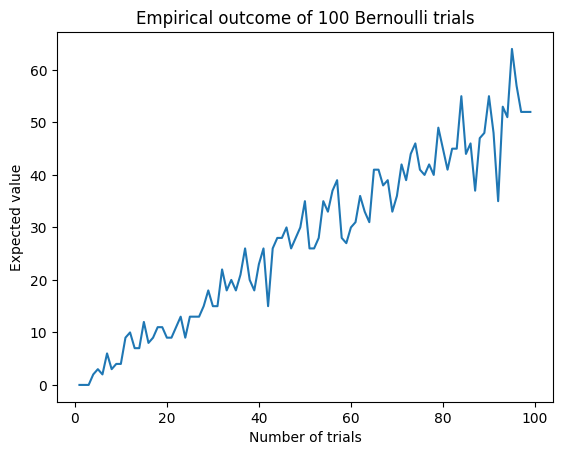

In [ ]:
x = torch.arange(1, 100)
y = torch.zeros(x.shape[0])

for i in x:
  m = Binomial(total_count=i, probs=probs)
  y[i-1] = m.sample()[0]

import matplotlib
import matplotlib.pyplot as plt

plt.figure()
plt.plot(x, y)
plt.title('Empirical outcome of 100 Bernoulli trials')
plt.xlabel('Number of trials')
plt.ylabel('Expected value')

In [ ]:
print("The expected value of this experiment outcome is: ", m.mean)
print("The variance in the value of the experiment outcome is: ", m.variance)

The expected value of this experiment outcome is:  tensor([54.4500])
The variance in the value of the experiment outcome is:  tensor([24.5025])


The expected value of the experiment outcome using $n$ samples can be calculated as:

$$
  \mu = \sum_{k=1}^n k \binom{n}{k} p^k (1-p)^{n-k}
$$

Rewriting $\binom{n}{k}$:

$$
  k \frac{n!}{(n-k)!k!} = n \frac{(n-1)!}{(n-(k-1))!(k-1)!} = n \binom{n-1}{k-1}
$$

The expected value becomes:

$$
  \mu = np \sum_{k=0}^{∞} \binom{n-1}{k-1} p^{k-1} (1-p)^{n-k-1}
$$

Using the formula $(x+y)^n = \sum_{k=0}^n \binom{n}{k} x^k y^{n-k}$

$$
     \mu = (np) (p + (1-p))^{n-1} = np
$$

Similarly, the variance can be computed as

$$
  \sigma^2 = n p (1 - p)
$$

## Probability Exercise

You are playing a game with your friends to toss a coin 5 successive times and you want to bet that all of them will be heads. Assume that the coin is fair. What is the probability that you will win this bet?

In [ ]:
import math # we can use this for factorial computation
import torch # we can also use the Binomial class directly

# TO-DO: Define the experiment parameters
n = 5
p = 0.5
k = 5

def prob_m(n, k, p): # function to manually compute probability
  # TO-DO: Compute the binomial probability function manually (using math)
  return math.factorial(n) / (math.factorial(n-k)*math.factorial(k)) * math.pow(p, k) * math.pow((1-p),(n-k))

def prob_t(n, k, p): # function to calculate prob. from PyTorch
  # TO-DO: Calculate probability using the log_prob(value=k) method of torch.distributions.binomial.Binomial(n, p)
  m = torch.distributions.Binomial(total_count=n, probs=p)
  return torch.exp(m.log_prob(value = torch.tensor(k)))

print("Probability of success at all 5 times is (calculated manually): ", prob_m(n, k, p))
print("Probability of success at all 5 times is (calculated with PyTorch): ", prob_t(n, k, p))

Probability of success at all 5 times is (calculated manually):  0.03125
Probability of success at all 5 times is (calculated with PyTorch):  tensor(0.0312)


Using either of the functions you implemented for probability computation, plot the distribution of binomial probability as k goes from 1 to 5 in the same coin tossing game.


Text(0, 0.5, 'p')

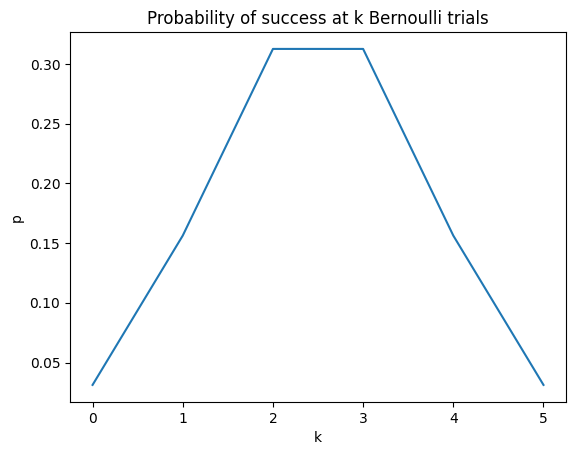

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

k = torch.arange(0, 6)
p = []
for i in k:
   p.append(prob_m(5, i, 0.5))

plt.figure()
plt.plot(k, p)
plt.title('Probability of success at k Bernoulli trials')
plt.xlabel('k')
plt.ylabel('p')


## Continuous random variables

While discrete random processes are useful for statistical applications which model certain events or experiments, in practice, all information in the nature surrounding us is continuous. Therefore, we need to be able to model and estimate the probabilistic behavior of continuous random processes.

The most commonly used distribution especially in physical or social information gathered from real-word data is a **Gaussian distribution**. The distribution has the shape of a symmetrical bell-shaped curve, and with mean $\mu$ and variance $\sigma^2$. The probability function of a random variable $ X \thicksim N(\mu, \sigma)$ is defined as:

$$
  f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}((x-\mu)/\sigma)^2}
$$

A random variable with a Gaussian distribution is said to be normally distributed. When the $\mu = 0$ and $\sigma = 1$ the distribution is called as the **standard normal distribution**.

In PyTorch, we can create and use Normal distributions as follows.

In [ ]:
from torch.distributions.normal import Normal

m = Normal(2.0, 3.0)
m.sample(sample_shape=(10, 2))  # normally distributed with mean = 2 and variance = 3

tensor([[-0.3773,  2.0132],
        [ 0.0372,  4.2510],
        [ 1.0083, -0.2134],
        [ 1.2567,  0.9329],
        [ 5.5052, -3.5179],
        [-1.6387,  1.3529],
        [-4.7382, -1.9832],
        [ 1.5741, -1.1062],
        [ 1.2051, -4.6974],
        [-1.7661, -0.6652]])

We can observe how the distribution we initialize in PyTorch with $\mu = 2 $ and $\sigma = 3$ looks like.

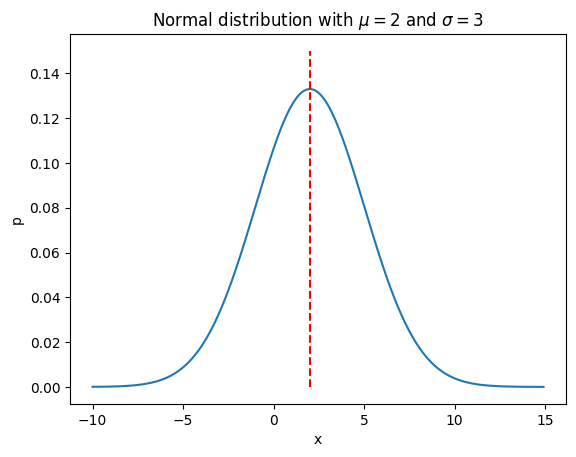

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

k = torch.arange(-10, 15, 0.1)
p = []
for i in k:
   p.append(torch.exp(m.log_prob(i)))

plt.figure()
plt.plot(k, p)
plt.plot([2, 2], [0,0.15], color = 'red', linestyle = '--')
plt.title('Normal distribution with $\mu = 2$ and $\sigma = 3$')
plt.xlabel('x')
plt.ylabel('p')
plt.show()

The PyTorch random number generator function randn() is also a convenient way to generate samples from a Normal distribution (N(0, 1)).

In [ ]:
import torch

torch.randn(size=(10, 2))

Finally, we also briefly mention another useful continuous random process with is the **uniform distribution**. The uniform distribution is a probability distribution in which the range of values the random variable might have are all equally likely to occur. The distribution is symmetrical and rectangular-shaped.

Text(0, 0.5, 'p')

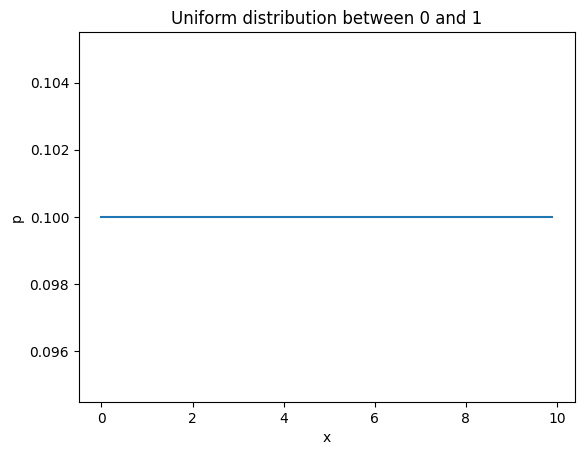

In [ ]:
from torch.distributions.uniform import Uniform

m = Uniform(low=0, high=10)
k = torch.arange(0, 10, 0.1)
p = []
for i in k:
   p.append(torch.exp(m.log_prob(i)))

plt.figure()
plt.plot(k, p)
plt.title('Uniform distribution between 0 and 1')
plt.xlabel('x')
plt.ylabel('p')

The simplest way to use uniform distribution is to use the random sampler in PyTorch.

**Note**: The function output is always between $[0, 1)$, but the outcome can be scaled to wider ranges of numbers based on the application.

In [ ]:
import torch

x = torch.rand(size=(1, 5))
print("The samples are equal to: ", x)

print("If we needed sample values between 0 and 10, we could also try to scale x by 10, s.t. x is in [0, 10)]: ", 10*x)

The samples are equal to:  tensor([[0.1508, 0.4574, 0.7840, 0.4838, 0.2653]])
If we needed sample values between 0 and 10, we could also try to scale x by 10, s.t. x is in [0, 10)]:  tensor([[1.5075, 4.5740, 7.8401, 4.8379, 2.6533]])


Generating random variables that follow certain distributions is going to be very important when we discuss learning systems, in particular, when we discuss pa

## Some additional revision material and references:
- Paul's Online Notes on Algebra and Calculus: https://tutorial.math.lamar.edu/
- PyTorch Distributions: https://pytorch.org/docs/stable/distributions.html#
